In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [2]:
#let's create the vectorizer and fit the corpus and transform them accordingly
v = TfidfVectorizer()
v.fit(corpus)
transform_output = v.transform(corpus)

In [3]:
print(v.vocabulary_)

{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


In [4]:
type(v.vocabulary_)

dict

In [5]:
v.vocabulary_.items()

dict_items([('thor', 25), ('eating', 10), ('pizza', 22), ('loki', 17), ('is', 16), ('ironman', 15), ('ate', 7), ('already', 0), ('apple', 5), ('announcing', 4), ('new', 20), ('iphone', 14), ('tomorrow', 26), ('tesla', 24), ('model', 19), ('google', 12), ('pixel', 21), ('microsoft', 18), ('surface', 23), ('amazon', 2), ('eco', 11), ('dot', 9), ('am', 1), ('biryani', 8), ('and', 3), ('you', 27), ('are', 6), ('grapes', 13)])

In [6]:
for key,value in v.vocabulary_.items():
      print(key,"|","-->IDF-->",v.idf_[value])

thor | -->IDF--> 2.386294361119891
eating | -->IDF--> 1.9808292530117262
pizza | -->IDF--> 2.386294361119891
loki | -->IDF--> 2.386294361119891
is | -->IDF--> 1.1335313926245225
ironman | -->IDF--> 2.386294361119891
ate | -->IDF--> 2.386294361119891
already | -->IDF--> 2.386294361119891
apple | -->IDF--> 2.386294361119891
announcing | -->IDF--> 1.2876820724517808
new | -->IDF--> 1.2876820724517808
iphone | -->IDF--> 2.386294361119891
tomorrow | -->IDF--> 1.2876820724517808
tesla | -->IDF--> 2.386294361119891
model | -->IDF--> 2.386294361119891
google | -->IDF--> 2.386294361119891
pixel | -->IDF--> 2.386294361119891
microsoft | -->IDF--> 2.386294361119891
surface | -->IDF--> 2.386294361119891
amazon | -->IDF--> 2.386294361119891
eco | -->IDF--> 2.386294361119891
dot | -->IDF--> 2.386294361119891
am | -->IDF--> 2.386294361119891
biryani | -->IDF--> 2.386294361119891
and | -->IDF--> 2.386294361119891
you | -->IDF--> 2.386294361119891
are | -->IDF--> 2.386294361119891
grapes | -->IDF--> 2.

In [7]:
#let's print the transformed output from tf-idf
print(transform_output.toarray())

[[0.24266547 0.         0.         0.         0.         0.
  0.         0.24266547 0.         0.         0.40286636 0.
  0.         0.         0.         0.24266547 0.11527033 0.24266547
  0.         0.         0.         0.         0.72799642 0.
  0.         0.24266547 0.         0.        ]
 [0.         0.         0.         0.         0.30652086 0.5680354
  0.         0.         0.         0.         0.         0.
  0.         0.         0.5680354  0.         0.26982671 0.
  0.         0.         0.30652086 0.         0.         0.
  0.         0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26982671 0.
  0.         0.5680354  0.30652086 0.         0.         0.
  0.5680354  0.         0.30652086 0.        ]
 [0.         0.         0.         0.         0.30652086 0.
  0.         0.         0.         0.         0.         0.
  0.

**Main Problem Starts Here :** 

In [8]:
!gdown 1alXD3A27zu6DJnOchYKQp5zglcwzQdf6

Downloading...
From: https://drive.google.com/uc?id=1alXD3A27zu6DJnOchYKQp5zglcwzQdf6
To: /content/Ecommerce_data.csv
100% 16.5M/16.5M [00:00<00:00, 51.8MB/s]


In [9]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("/content/Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [10]:
df.label.value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

Dataset is Balanced

In [11]:
#Add the new column which gives a unique number to each of these labels 

df['label_num'] = df['label'].map({
    'Household' : 0, 
    'Books': 1, 
    'Electronics': 2, 
    'Clothing & Accessories': 3
})

#checking the results 
df.head(5)


,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


# Train test split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [13]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [14]:
y_train.value_counts()

0    4800
2    4800
3    4800
1    4800
Name: label_num, dtype: int64

In [15]:
y_test.value_counts()

0    1200
2    1200
3    1200
1    1200
Name: label_num, dtype: int64

# Using KNN as the classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.97      0.95      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.98      0.97      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [17]:
X_test[:10]

20706    Lal Haveli Designer Handmade Patchwork Decorat...
19166    GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209    FabSeasons Camouflage Polyester Multi Function...
2462     Indian Superfoods: Change the Way You Eat Revi...
6621     Milton Marvel Insulated Steel Casseroles, Juni...
21839    HP X900 USB Mouse (Black) Dependable quality s...
3048     Gupta Fancy Store Wind Chime Feng Shui Om Vast...
21834    Wuthering Heights Intermediate Level Reader Ma...
15364    Gizga Essentials Gz-Ck-102 Professional Cleani...
19017    JBL GO Portable Wireless Bluetooth Speaker wit...
Name: Text, dtype: object

In [18]:
y_test[:10]

20706    0
19166    2
15209    3
2462     1
6621     3
21839    2
3048     0
21834    1
15364    2
19017    2
Name: label_num, dtype: int64

In [19]:
y_pred[:10]

array([0, 2, 3, 1, 0, 2, 0, 1, 2, 2])

# Using MultiNomial Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.92      0.95      1200
           2       0.97      0.97      0.97      1200
           3       0.97      0.99      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



# Using Random Forest as the classifier.

In [21]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



**Random Forest gives the best Accuracy**

# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [22]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [23]:
df['preprocessed_txt'] = df['Text'].apply(preprocess) 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [25]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.99      0.99      0.99      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1162,    9,   16,   13],
       [  20, 1171,    6,    3],
       [  20,    7, 1171,    2],
       [   5,    3,    1, 1191]])

Text(95.72222222222221, 0.5, 'Truth')

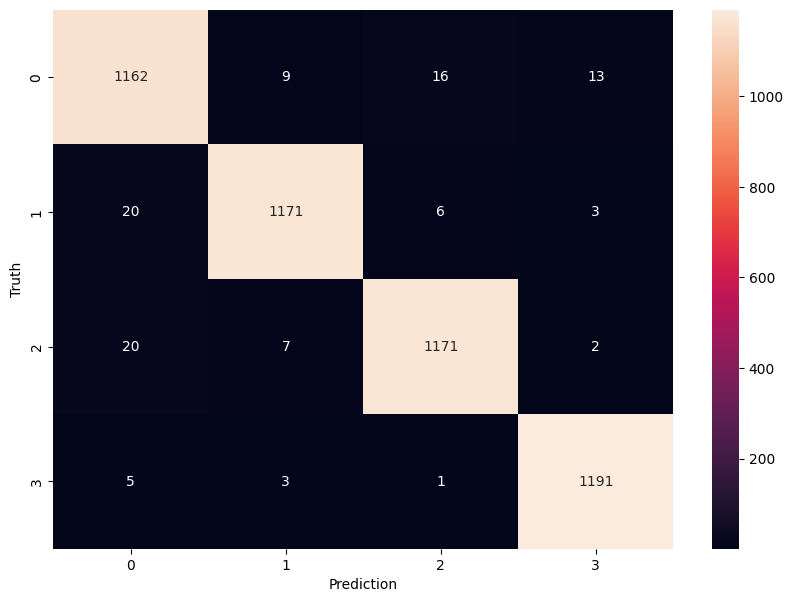

In [27]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

link-->https://colab.research.google.com/drive/1pWq-KR9lpLXqTNYhFUq9jNXluzwpOqIM?usp=sharing